In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.DataFrame(data= {'Delivery Time':[21,13.5,19.75,24,29,15.35,19,9.5,17.9,18.75,19.83,10.75,16.68,11.5,
                                        12.03,14.88,13.75,18.11,8,17.83,21.5],
                        'Sorting Time':[10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5]})

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df1= df.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

In [5]:
df1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# Cheking for outliers

<AxesSubplot:xlabel='DT'>

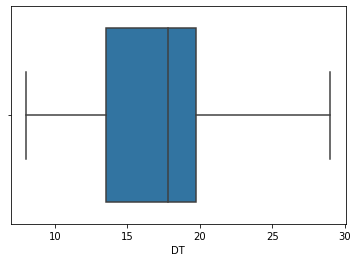

In [6]:
sns.boxplot(x='DT', data=df1)

<AxesSubplot:xlabel='ST'>

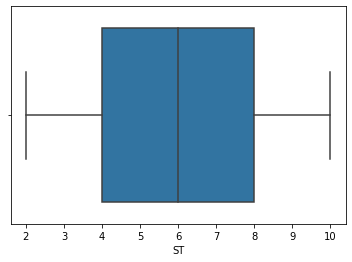

In [7]:
sns.boxplot(x='ST', data=df1)

<AxesSubplot:xlabel='DT', ylabel='Count'>

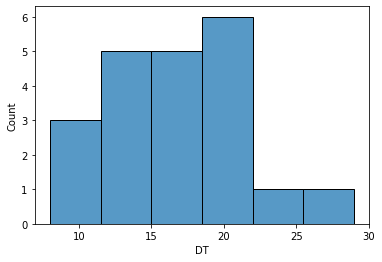

In [8]:
sns.histplot(df1.DT)

<AxesSubplot:xlabel='ST', ylabel='Count'>

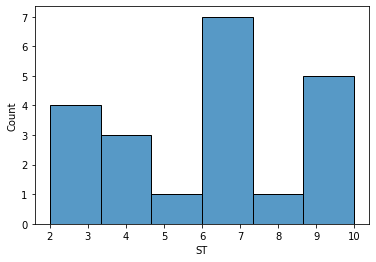

In [9]:
sns.histplot(df1.ST)

# Checking for duplicated rows

In [10]:
df1[df1.duplicated()].shape

(0, 2)

# Building the model

In [11]:
model = smf.ols("DT~ST", data=df1).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

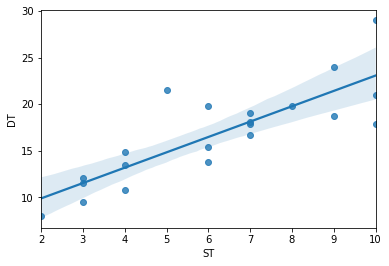

In [12]:
sns.regplot(x='ST', y='DT', data=df1)

In [13]:
print('P value is:', model.pvalues, '\n', '\n', 'Rsquared value is:',model.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model.rsquared )

P value is: Intercept    0.001147
ST           0.000004
dtype: float64 
 
 Rsquared value is: 0.6822714748417231 
 
 Adjusted Rsquared value is: 0.6822714748417231


In [14]:
#Since the rsquared value is less, we need to try some transformations

# Iteration 1

In [15]:
df1['ST2'] = df1['ST']**2

In [16]:
df1.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [17]:
model1= smf.ols('DT~ST2', data=df1).fit()

In [18]:
print('P value is:', model1.pvalues, '\n', '\n', 'Rsquared value is:',model1.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model1.rsquared )

P value is: Intercept    1.415704e-08
ST2          1.739194e-05
dtype: float64 
 
 Rsquared value is: 0.6302871815826637 
 
 Adjusted Rsquared value is: 0.6302871815826637


In [19]:
#Since R squared value is again less, trying another alternative

In [20]:
model2= smf.ols('DT~ST+ST2', data=df1).fit()

In [21]:
print('P value is:', model2.pvalues, '\n', '\n', 'Rsquared value is:',model2.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model2.rsquared )

P value is: Intercept    0.408248
ST           0.070097
ST2          0.428641
dtype: float64 
 
 Rsquared value is: 0.6934396274520247 
 
 Adjusted Rsquared value is: 0.6934396274520247


In [22]:
#R squared value is still less.

# Itertion 2

In [23]:
df1['logST'] = np.log(df1['ST'])

In [24]:
df1.head(3)

,DT,ST,ST2,logST
0,21.00,10,100,2.302585
1,13.50,4,16,1.386294
2,19.75,6,36,1.791759


In [25]:
model3= smf.ols('DT~logST', data=df1).fit()

In [26]:
print('P value is:', model3.pvalues, '\n', '\n', 'Rsquared value is:',model3.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model3.rsquared )

P value is: Intercept    0.641980
logST        0.000003
dtype: float64 
 
 Rsquared value is: 0.6954434611324223 
 
 Adjusted Rsquared value is: 0.6954434611324223


In [27]:
#R squared value is still less.

# Iteration 3

In [28]:
df1['sqrtST'] = df1['ST']**(1/2)

In [29]:
df1.head()

,DT,ST,ST2,logST,sqrtST
0,21.00,10,100,2.302585,3.162278
1,13.50,4,16,1.386294,2.000000
2,19.75,6,36,1.791759,2.449490
3,24.00,9,81,2.197225,3.000000
4,29.00,10,100,2.302585,3.162278


In [30]:
model4= smf.ols('DT~sqrtST', data=df1).fit()

In [31]:
print('P value is:', model4.pvalues, '\n', '\n', 'Rsquared value is:',model4.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model4.rsquared )

P value is: Intercept    0.410857
sqrtST       0.000003
dtype: float64 
 
 Rsquared value is: 0.695806227630867 
 
 Adjusted Rsquared value is: 0.695806227630867


In [32]:
#R squared value is still less.

In [33]:
#Since the variable transformation doesn't seem to show enough improvement on r squared value, hence, we'll 
#try for model deletion diagnostics

# Model deletion diagnostics

# Cook's distance

# Interation 4

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

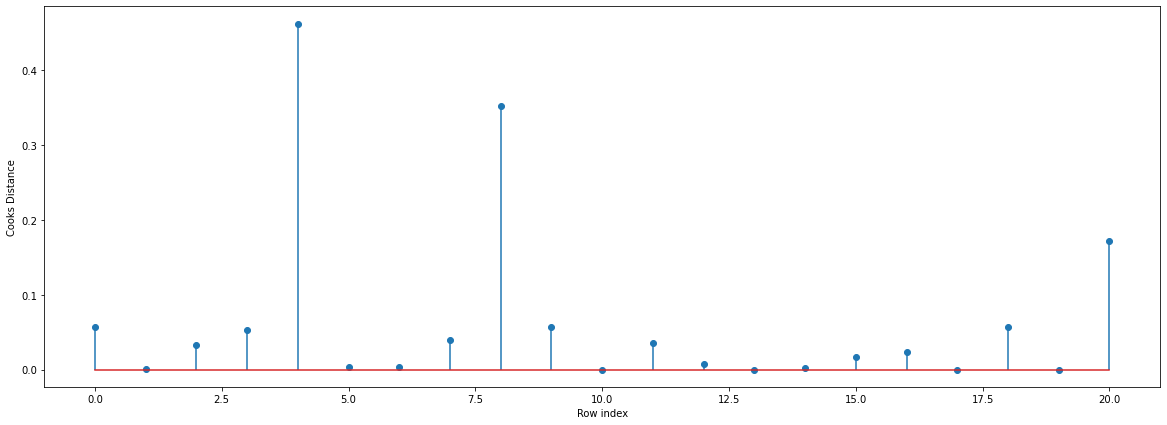

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
np.argmax(c), np.max(c)

(4, 0.4620530412650316)

In [37]:
df2= df1.drop([4],axis=0)

In [38]:
df3 = df2.reset_index()

In [39]:
df4 = df3.drop(['index'],axis=1)

In [40]:
model5 = smf.ols('DT~ST', data=df4).fit()

In [41]:
print('P value is:', model5.pvalues, '\n', '\n', 'Rsquared value is:',model5.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model5.rsquared )

P value is: Intercept    0.000147
ST           0.000013
dtype: float64 
 
 Rsquared value is: 0.660207261776224 
 
 Adjusted Rsquared value is: 0.660207261776224


# Iteration 5

In [42]:
model_influence = model5.get_influence()
(c1, _) = model_influence.cooks_distance

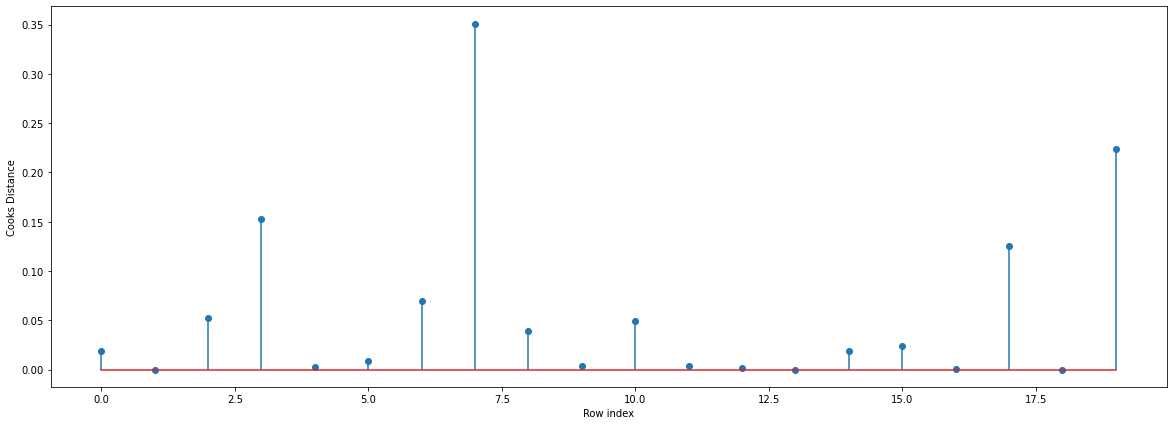

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
np.argmax(c1), np.max(c1)

(7, 0.3508974803877879)

In [45]:
df5= df4.drop([7],axis=0)

In [46]:
df6= df5.reset_index()

In [47]:
df7= df6.drop(['index'], axis=1)

In [48]:
model6= smf.ols('DT~ST', data=df7).fit()

In [49]:
print('P value is:', model6.pvalues, '\n', '\n', 'Rsquared value is:',model6.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model6.rsquared )

P value is: Intercept    0.000420
ST           0.000005
dtype: float64 
 
 Rsquared value is: 0.714075554704391 
 
 Adjusted Rsquared value is: 0.714075554704391


In [50]:
#Since r squared value has increased, we'll try eliminating another influence point

# Iteration 6

In [51]:
model_influence = model6.get_influence()
(c2, _) = model_influence.cooks_distance

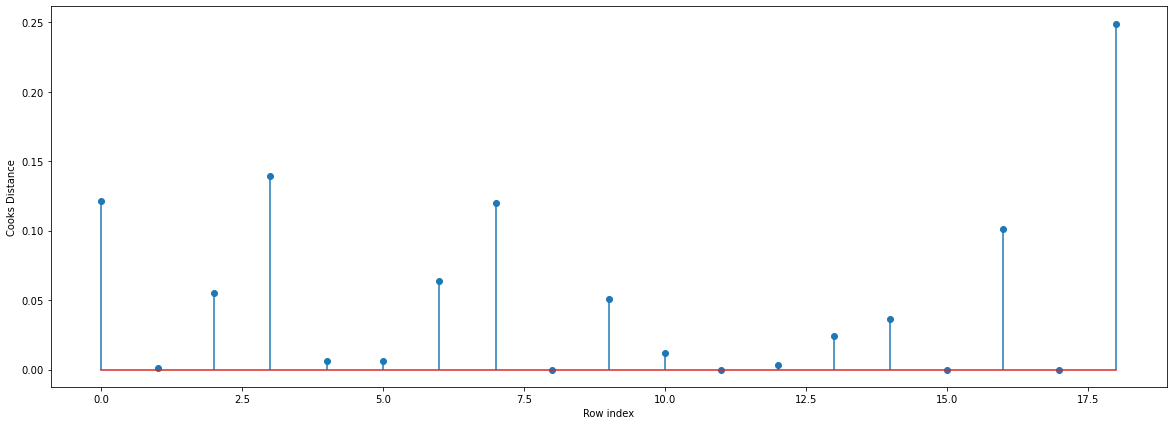

In [52]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df7)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
np.argmax(c2), np.max(c2)

(18, 0.24932621731860327)

In [54]:
df8= df7.drop([18],axis=0)

In [55]:
df9 = df8.reset_index()

In [56]:
df10 = df9.drop(['index'],axis=1)

In [57]:
model7 = smf.ols('DT~ST', data=df10).fit()

In [58]:
print('P value is:', model7.pvalues, '\n', '\n', 'Rsquared value is:',model7.rsquared, 
      '\n', '\n', 'Rsquared value is:', model7.rsquared )

P value is: Intercept    1.015144e-04
ST           1.273152e-07
dtype: float64 
 
 Rsquared value is: 0.8332330202945817 
 
 Rsquared value is: 0.8332330202945817


In [59]:
#Since r squared value has further increased, we'll try eliminating another influence point

# Iteration 7

In [60]:
model_influence = model7.get_influence()
(c3, _) = model_influence.cooks_distance

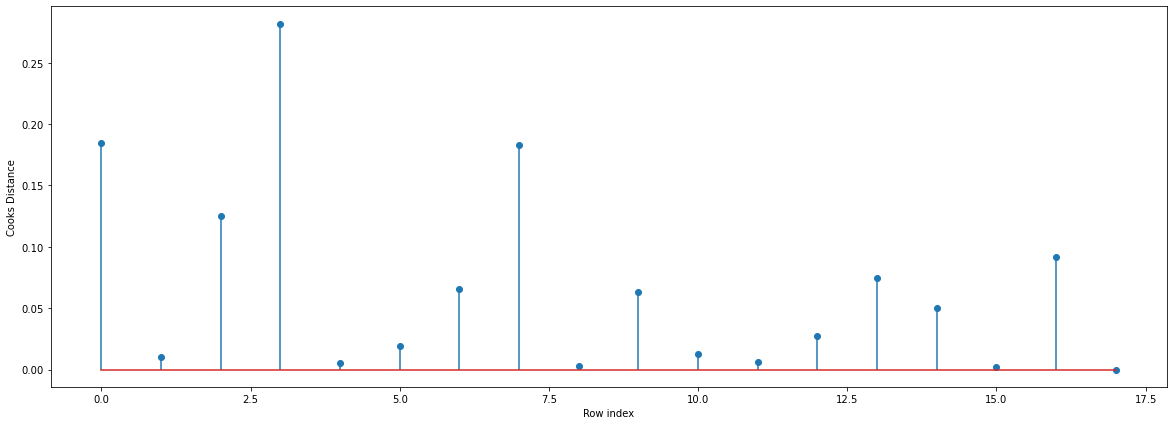

In [61]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df10)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
np.argmax(c3), np.max(c3)

(3, 0.28237359768558323)

In [63]:
df11 = df10.drop([3],axis=0)

In [64]:
df12= df11.reset_index()

In [65]:
df13= df12.drop(['index'],axis=1)

In [66]:
model8= smf.ols('DT~ST', data=df13).fit()

In [67]:
print('P value is:', model8.pvalues, '\n', '\n', 'Rsquared value is:',model8.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model8.rsquared )

P value is: Intercept    3.646510e-05
ST           4.438326e-07
dtype: float64 
 
 Rsquared value is: 0.8259909851443229 
 
 Adjusted Rsquared value is: 0.8259909851443229


# Since r squared value has decreased, we'll not delete any influence point going further

In [68]:
#Hence the best rsquared value was at the end of iteration 6, i.e. 
print('R squared value after iteration 6',round(model7.rsquared,4))

R squared value after iteration 6 0.8332


# We can check the transformations once again with the improved dataset at the end of iteration 6

# Iteration 8

In [69]:
model9 = smf.ols('DT~ST+ST2',data=df10).fit()

In [70]:
print('R squared value after iteration 8',round(model9.rsquared,4))

R squared value after iteration 8 0.844


In [71]:
#Since there's a slight increase, we'll try for other combinations as well

# Iteration 9

In [72]:
model10= smf.ols('DT~ST+ST2+logST',data=df10).fit()

In [73]:
print('R squared value after iteration 9',round(model9.rsquared,4))

R squared value after iteration 9 0.844


# Since there's isn't any increase upto 4th decimal place, hence we can finalise the result of iteration 8 as the best model

In [74]:
df_final = df10.drop(['logST','sqrtST'],axis=1)

In [75]:
df_final.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [76]:
model_final = model9

In [78]:
print(model_final.params,'\n','\n',model_final.pvalues,'\n','\n',round(model_final.rsquared,4),'\n','\n',
      round(model_final.rsquared_adj,4))

Intercept    3.473031
ST           2.700664
ST2         -0.087270
dtype: float64 
 
 Intercept    0.229684
ST           0.019084
ST2          0.326135
dtype: float64 
 
 0.844 
 
 0.8231
